In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
gender_data=pd.read_csv('gender_submission.csv')

In [32]:
train_data=pd.DataFrame(train_data)
test_data=pd.DataFrame(test_data)

In [67]:
print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [35]:
women=train_data.loc[train_data.Sex=='female']['Survived']
male=train_data.loc[train_data.Sex=='male']['Survived']

In [36]:
# Women Survival Rate
w_count=sum(women)/len(women)
w_count=w_count*100
print(w_count)

74.20382165605095


In [37]:
# Male Survival Rate
m_count=sum(male)/len(male)
m_count=m_count*100
print(m_count)

18.890814558058924


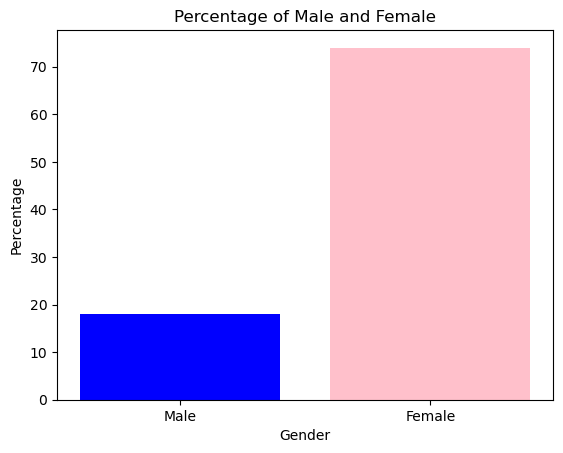

In [70]:
#Plot of male and female survived percentage
categories = ['Male', 'Female']
percentages = [18, 74]
plt.bar(categories, percentages, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Male and Female')
plt.show()

In [53]:
train_features=train_data[["Pclass", "Sex", "SibSp", "Parch"]]
test_features=test_data[["Pclass", "Sex", "SibSp", "Parch"]]
train_target=train_data['Survived']

In [54]:
train_features=pd.get_dummies(train_features)
test_features=pd.get_dummies(test_features)

In [58]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10)
historyy= clf.fit(train_features,train_target)
prediction=clf.predict(test_features)


In [61]:
Idnumber=test_data['PassengerId']
Final=pd.DataFrame({'PassengerID':Idnumber,'Survived': prediction})

In [74]:
Final.to_csv(r'F:\Kaggle\TITANIC DATASET\Submission.csv', index=False)